## Explicit Trapezoidal Method

Our goal is to implement the explicit trapezoidal method and compare its error to that of the forward Euler method.

The explicit trapezoidal incorporates the forward Euler method ($\widehat{y_{FE}}$) and is defined

The method is

\begin{equation*}
\widehat{y}(t + \Delta t) = \widehat{y}(t) + \Delta t \cdot \frac{f(t,\widehat{y}(t))+f(t+\Delta t, \widehat{y_{FE}}))}{2}
\end{equation*}

where 

\begin{equation*}
\widehat{y_{FE}}(t + \Delta t) = \widehat{y}(t) + \Delta t \cdot f(t,\widehat{y}(t))
\end{equation*}

We first need the degradation model and the forward Euler method (for comparison).

In [78]:
import numpy as np
import scipy.integrate

def degradation_model( t, y, params ):
    y1 = y[0]
    y2 = y[1]
    dydt = np.zeros( (2,) )
    dydt[0] = -params[0] * y1
    dydt[1] = -params[1] * y2
    return dydt

In [79]:
def forwardEuler( fn, t, y0, params ):
    """ [t,y] = forwardEuler( fn, t, y0, params )
    Given a function handle fn for dydt, find the value of
    y at timepoints t, given y(0) = y0.
    fn takes t, y, and params as input.
    t is 1-dimensional (NT,)
    y is 2-dimensional (NY,NT)
    """
    y = np.zeros( (y0.size,t.size) )
    y[:,0] = y0;
    for i in range(1,t.size):
        h = t[i]-t[i-1];
        yprime = fn(t[i-1],y[:,i-1],params);
        y[:,i] = y[:,i-1] + h*yprime;
    
    return (t,y)

### Implement Explicit Trapezoidal Method

Implement the method so that is uses the same interface as Forward Euler.

So you don't need to scan up, I retype the methor here:

\begin{equation*}
\widehat{y}(t + \Delta t) = \widehat{y}(t) + \Delta t \cdot \frac{f(t,\widehat{y}(t))+f(t+\Delta t, \widehat{y_{FE}}))}{2}
\end{equation*}

where 

\begin{equation*}
\widehat{y_{FE}}(t + \Delta t) = \widehat{y}(t) + \Delta t \cdot f(t,\widehat{y}(t))
\end{equation*}

In [80]:
def explicitTrapezoidal( fn, t, y0, params ):
    """[t,y] = explicitTrapezoidal( fn, t, y0, params )
    Given a function handle fn for y', find the value of
    y at timepoints t, assuming y(0) = y0.
    fn takes t, y, and params as input.
    t is 1-dimensional (NT,)
    y is 2-dimensional (NY,NT)
    """
    y = np.zeros( (y0.size,t.size) )
    y[:,0] = y0;
    for i in range(1,t.size):
        h = t[i]-t[i-1];
        yprime = fn(t[i-1],y[:,i-1],params);
        yhatFE = y[:,i-1] + h*yprime;
        yprimehatFE = fn(t[i],yhatFE,params);
        y[:,i] = y[:,i-1] + h/2*(yprime+yprimehatFE);

    return (t,y)

### Run and plot result from Explicit Trapezoidal method.

Run both the forward Euler and explicit trapezoidal methods on the degradation model with degradation rates (2,5) and initial conditions (1,1) with time steps from 0 to 4 with a step of 0.1.

Then plot the true solution (solid lines), forward Euler's solution (dashed lines), and explicit trapezoidal's solution (dotted lines).

Then plot the difference over time between the true solution and forward Euler's solution (dashed lines) and then the difference over time between the true solution and explicit trapezoidal's solution (dotted lines).

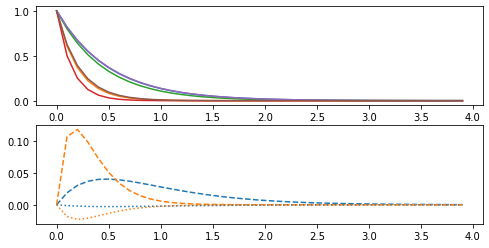

In [81]:
import matplotlib.pyplot as plt
params = np.array([2,5])
y0 = np.array([1,1])
t = np.arange(0,4,0.1)
(tFE,yFE) = forwardEuler( degradation_model, t, y0, params)
tru_y1 = y0[0]*np.exp(-params[0]*t)
tru_y2 = y0[1]*np.exp(-params[1]*t)
tru_y = np.vstack( ( tru_y1, tru_y2) )

(t,y) = explicitTrapezoidal( degradation_model, t, y0, params)
plt.figure( figsize = (8,4) )
plt.subplot(2,1,1)
plt.plot(t, tru_y.T )
plt.plot(tFE, yFE.T);
plt.plot(t,y.T)
plt.subplot( 2, 1, 2 )
plt.plot( t, tru_y.T-yFE.T, '--' )
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot( t, tru_y.T-y.T, ':');

### Error vs Step Size

Determine how the error changes with the time step for both forward Euler and Explicit Trapezoidal. Plot two figures - one with the simulations and one with the errors. Compute the error using one method: Compute the Euclidean distance between the true solution and the approximate solution (2-norm of the difference) at each time point, then take the mean across time.

Make an array of time steps. For each time step, plot each solution in a separate subfigure, and keep track of the error in an array. Then plot the errors in a second figure, with each error computation in a separate subfigure.

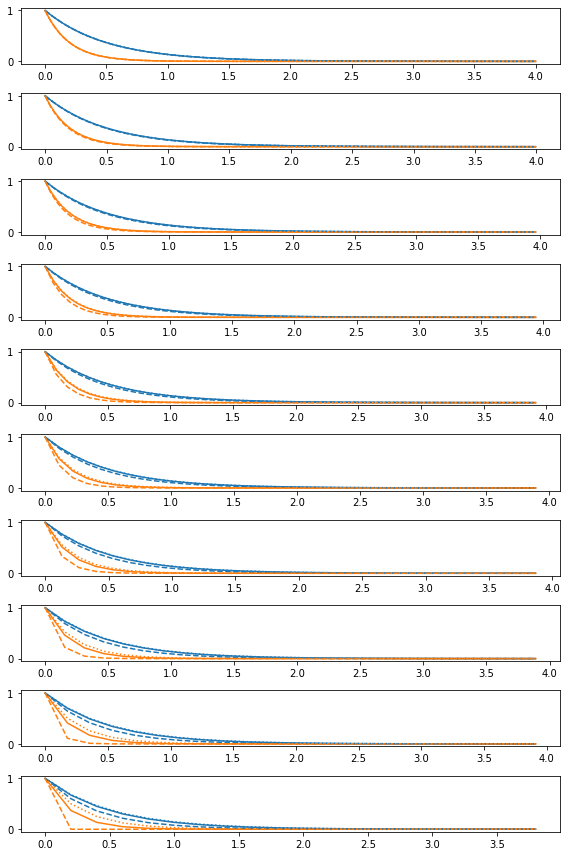

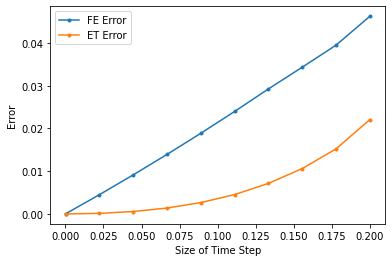

In [86]:
# range from smallest timestep that doesn't take way too long to run to largest time step with qualitatively correct answer.
dts = np.linspace(1e-4,0.2,10)
err1 = np.zeros( (dts.size,) )
err2 = np.zeros( (dts.size,) )
params = (2,5)
y0 = np.array((1,1))

plt.figure(figsize=(8,12))
for i in range(dts.size):
    t = np.arange(0,4,dts[i])
    sol = scipy.integrate.solve_ivp(fun=degradation_model, t_span=(0,150), y0=y0, method='LSODA', rtol=1e-8, atol=1e-8, t_eval=t, args=[params] )
    (t,y) = forwardEuler( degradation_model, t, y0, params)
    plt.subplot( dts.size, 1, i+1 )
    plt.plot( t, sol.y.T )
    plt.gca().set_prop_cycle(None) # this resets the color cycle
    plt.plot( t, y.T, '--')
    err1[i] = np.mean(scipy.linalg.norm( sol.y-y, 2, axis=0) )
    plt.gca().set_prop_cycle(None) # this resets the color cycle
    (t,y) = explicitTrapezoidal( degradation_model, t, y0, params)
    plt.plot( t, y.T, ':')
    err2[i] = np.mean(scipy.linalg.norm( sol.y-y, 2, axis=0) )
plt.tight_layout()
    
plt.figure()
plt.plot( dts, err1, '.-' );
plt.plot( dts, err2, '.-' );
plt.legend( ['FE Error','ET Error']);
plt.xlabel( 'Size of Time Step');
plt.ylabel( 'Error');

## Bonus Code
This is the code Stephanie used to generate the illustration figure for her lecture notes.

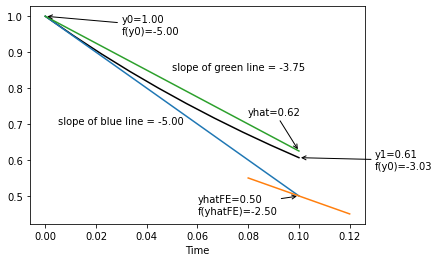

In [83]:
# Illustrate one step of the explicit trapezoidal method

def degradation_model1D( t, y, params ):
    dydt = -params[0] * y;
    return dydt
fn = degradation_model1D

# set up the usual problem, with a faster degradation rate 
# to exaggerate the differences somewhat.
y0 = 1
params = (5,)
h = 0.1 # step size
t0 = 0 # first time step

# one step of trapezoidal method
yprime = fn(t0,y0,params);
yhatFE = y0 + h*yprime;
yprimehatFE = fn(t0+h,yhatFE,params);
yhat = y0 + h*(yprime+yprimehatFE)/2;

# To get the curvature, compute the true solution over 10
# steps within this single step.
tru_t = np.linspace(0,h,10)
tru_y = y0*np.exp(-params[0]*tru_t)

# Plot the true solution, along with the interdediate estimate
# and the slopes.
plt.plot( tru_t, tru_y, 'k' );
plt.plot( [t0, t0+h], [y0, yhatFE]);
plt.plot( [t0+h-0.02,t0+h+0.02], [yhatFE-0.02*yprimehatFE,yhatFE+0.02*yprimehatFE]);
plt.plot( [t0,t0+h],[y0,yhat]);
plt.annotate( "y0=%0.2f\nf(y0)=%0.2f"% (y0,yprime), (t0,y0), (t0+0.03,y0-0.05), 
                  xycoords='data', arrowprops={'arrowstyle':'->'});
plt.annotate( "y1=%0.2f\nf(y0)=%0.2f"% (tru_y[-1],fn(t0+h,tru_y[-1],params)), (t0+h,tru_y[-1]), (t0+h+0.03,y1-0.05), 
                  xycoords='data', arrowprops={'arrowstyle':'->'});
plt.annotate( "yhatFE=%0.2f\nf(yhatFE)=%0.2f"% (yhatFE,yprimehatFE), (t0+h,yhatFE), (t0+h-0.04,yhatFE-0.05), 
                  xycoords='data', arrowprops={'arrowstyle':'->'});
plt.annotate( "yhat=%0.2f"% (yhat), (t0+h,yhat), (t0+h-0.02,yhat+0.1), 
                  xycoords='data', arrowprops={'arrowstyle':'->'});
plt.annotate( "slope of blue line = %0.2f" % yprime, (0.005,0.7))
plt.annotate( "slope of green line = %0.2f" % ((yprime+yprimehatFE)/2), (0.05,0.85) );
plt.xlabel( "Time");